# Proyecto Integrador

## Score de Riesgo en Originación de Crédito 
## Para Kubo Financiero

Participantes: 

Dalina Aideé Villa Ocelotl (A01793258)

Julián Valera Juarez (A01793875)

Miguel Guillermo Galindo Orozco (A01793695)


# Análisis Exploratorio de Datos (EDA)

### Importar librerías

In [85]:
import pandas as pd
import openpyxl 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

### Lectura de Data

In [2]:
df = pd.read_excel('/Users/memowayun/Documents/MNA/Cursos/BigData/base_20210101a20240430 (2).xlsx')

In [3]:
df.head(3)

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,MontoCredR,NumCredI,MontoCredI,NumCredM,MontoCredM,montocredito_actual,estatus_actual,diasatraso_actual,es_malo_actual,saldo_actual
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,14997.0,10.0,98826.0,0.0,0.0,50000,P,0,0,NaN
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,10469.0,49.0,37484.0,0.0,0.0,48000,P,0,0,NaN
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,527690.0,1.0,113100.0,0.0,0.0,10000,P,0,0,NaN


In [4]:
print(len(df))

35197


In [5]:
print("La base de datos a utilizar cuenta con " + str(len(df)) + " registros y "  + str(len(df.columns)) + " columnas")

La base de datos a utilizar cuenta con 35197 registros y 28 columnas


### ¿Qué tipos de variables tiene el DataFrame?

![](/Users/memowayun/Documents/MNA/Cursos/BigData/diccionario.jpeg)

#### Comentarios 
Observamos que la variable a predecir es "es_malo_actual" 

y que las variables: 

- montocredito_actual 
- estatus_actual
- diasatraso_actual
- saldo_actual

son variables con información de performance, y no al momento de evaluar si le dan o no el crédito, por lo no debería usarse o existiría una fuga de datos. 

Se decide eliminar esas variables

In [9]:
variables_eliminar = ["montocredito_actual", "estatus_actual","diasatraso_actual","saldo_actual"]
variables_ok = [i for i in df.columns if i not in variables_eliminar ]
df = df[variables_ok]

In [10]:
# Columnas por tipo de dato
df.dtypes.value_counts()

float64           11
int64              6
object             6
datetime64[ns]     1
Name: count, dtype: int64

Con lo anterior vemos que contamos con 17 numéricas, 6 variables categóricas, y 1 variable de fechas.

In [11]:
## Columnas
for i in df.columns: print(i)

prospectus_id
Edad
Genero
EstadoCivil
DependientesEconomicos
Estado
ActividadEconomica
NivelEstudios
NumCaracteresSobreMi
consulting_date
cci_score
bc_score
NumCredHist
MontoCredHist
CredMobMayor2
NumCredActivos
MontoCredActivos
NumCredR
MontoCredR
NumCredI
MontoCredI
NumCredM
MontoCredM
es_malo_actual


### Distibución Bandera de Default

Primero eliminamos registros sin bandera de bueno o malo

In [12]:
df = df[df['es_malo_actual'].isin([0,1])]

In [13]:
df.groupby('es_malo_actual').size()

es_malo_actual
0    28119
1     7078
dtype: int64

In [14]:
print("Tasa de Default del " + str(round(100*(7078/(28119+7078)), 2 )) + "%")

Tasa de Default del 20.11%


<Axes: ylabel='count'>

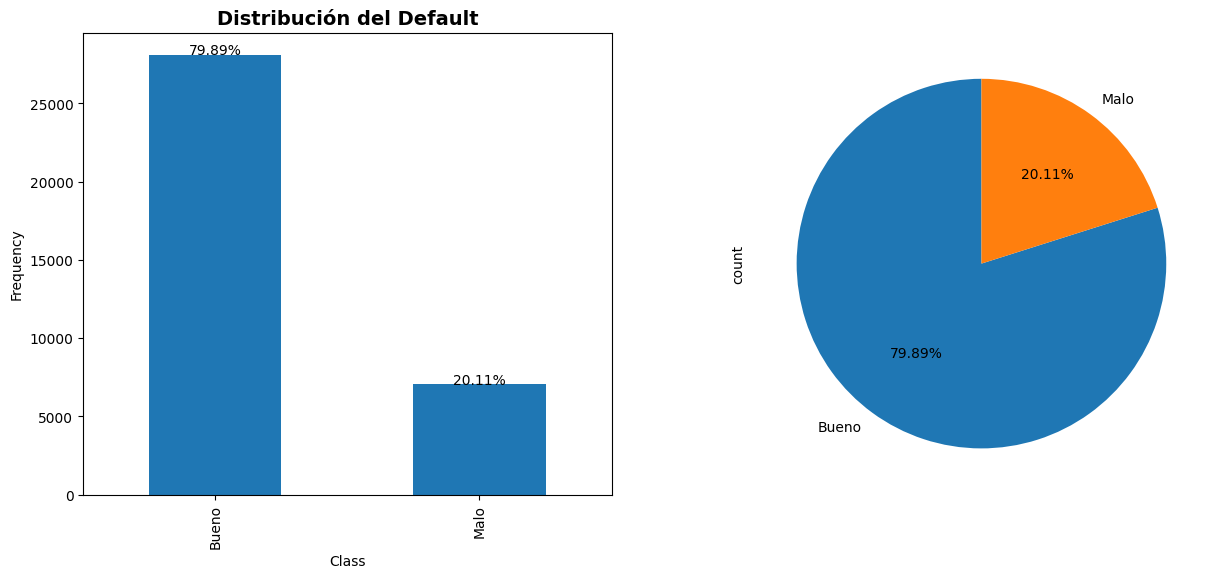

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Distribución del Default', fontweight='bold',fontsize=14)
count_of_classes = pd.value_counts(df['es_malo_actual'], sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Bueno","Malo"])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 


plt.subplot(122)
labels = 'Bueno', 'Malo'
df["es_malo_actual"].value_counts().plot.pie(autopct = "%1.2f%%", labels=labels, startangle=90)

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 

In [16]:
columnas_conInformacion = []
columnas_conNulos = [] 

for i in df.columns: 
    if df[i].isnull().sum() > 0: 
        columnas_conNulos.append(i)
    else:
        columnas_conInformacion.append(i)

In [17]:
print(str(len(columnas_conNulos)) + " columnas con valores nulos")

11 columnas con valores nulos


In [18]:
df_nulos = df[columnas_conNulos]

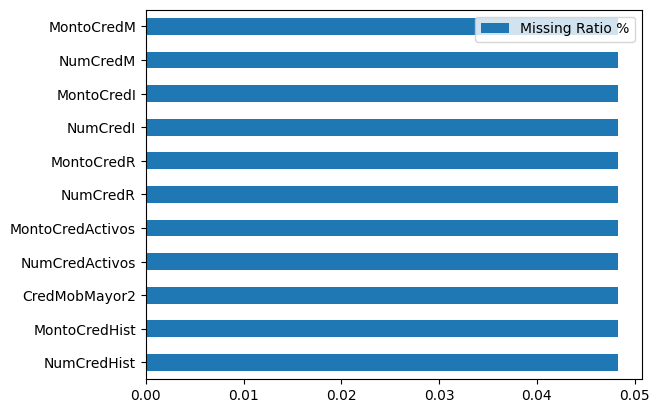

In [19]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_nulos)

In [21]:
for i in df_nulos: 
    print(" La variable " + str(i) + " tiene " + str(df[i].isnull().sum()) 
          + " valores nulos con una tasa de default en valores nulos de " 
          + str (round(100*(len(df[df[i].isnull()].query('es_malo_actual == 1')) / df[i].isnull().sum()),2)) 
          + "%" )

 La variable NumCredHist tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable MontoCredHist tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable CredMobMayor2 tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable NumCredActivos tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable MontoCredActivos tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable NumCredR tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable MontoCredR tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable NumCredI tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable MontoCredI tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable NumCredM tiene 17 valores nulos con una tasa de default en valores nulos de 0.0%
 La variable MontoCredM tiene

#### Comentarios

Con lo anterior observamos que sólo 11 columnas tienen valores nulos, en su mayoría las columnas con valores nulos sólo tienen 17 registros con estas carecterísticas, y la tasa de default en estos es el 0%. 

Por lo que no se encuentra ningún patron específico. 

### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

##### Estadísticas Variables Numéricas

In [31]:
df.drop(['prospectus_id'], axis=1).describe()

,Edad,NumCaracteresSobreMi,consulting_date,cci_score,bc_score,NumCredHist,MontoCredHist,CredMobMayor2,NumCredActivos,MontoCredActivos,NumCredR,MontoCredR,NumCredI,MontoCredI,NumCredM,MontoCredM,es_malo_actual
count,35197.000000,35197.000000,35197,35197.000000,35197.000000,35180.000000,3.518000e+04,35180.000000,35180.000000,3.518000e+04,35180.000000,3.518000e+04,35180.000000,3.518000e+04,35180.000000,3.518000e+04,35197.000000
mean,35.755633,59.099838,2022-09-19 12:43:17.301985792,6.584709,667.338012,20.766117,5.923742e+05,0.128283,6.848408,2.577287e+05,5.366543,1.110001e+05,13.775384,3.557431e+05,0.217851,1.167827e+05,0.201097
min,19.000000,0.000000,2021-01-01 09:34:35,-3.000000,-9.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,29.000000,0.000000,2021-12-28 17:04:38,6.000000,654.000000,7.000000,5.456475e+04,0.000000,3.000000,2.702175e+04,2.000000,1.476950e+04,1.000000,1.129800e+04,0.000000,0.000000e+00,0.000000
50%,33.000000,34.000000,2022-10-16 21:53:07,7.000000,665.000000,13.000000,1.814195e+05,0.000000,6.000000,8.122400e+04,4.000000,3.921200e+04,5.000000,7.499700e+04,0.000000,0.000000e+00,0.000000
75%,41.000000,80.000000,2023-06-01 09:19:05,8.000000,678.000000,25.000000,5.321192e+05,0.000000,9.000000,2.824252e+05,7.000000,1.058215e+05,16.000000,2.715048e+05,0.000000,0.000000e+00,0.000000
max,2015.000000,2243.000000,2024-04-29 23:52:10,9.000000,750.000000,558.000000,4.054271e+08,10.000000,85.000000,1.620946e+07,230.000000,4.498336e+07,550.000000,4.043686e+08,8.000000,1.554102e+07,1.000000
std,14.289777,83.199233,NaN,1.421994,18.043977,25.689678,6.619148e+06,0.469970,5.208047,5.367846e+05,4.989510,3.403223e+05,24.008437,6.563110e+06,0.538265,4.818396e+05,0.400826


##### Estadísticas Variables Categóricas

In [32]:
df.describe(include='object')

,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios
count,35197,35197,35197,35197,35197,35197
unique,2,6,6,33,7,7
top,Hombre,Soltero,0,Ciudad de México,Empleado,Licenciatura
freq,19957,21600,21473,9604,27159,24054


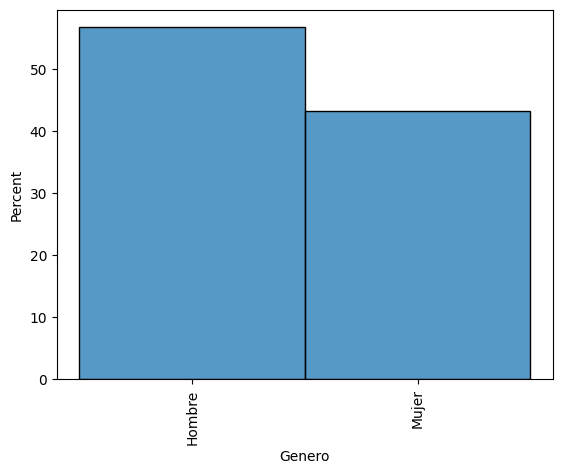

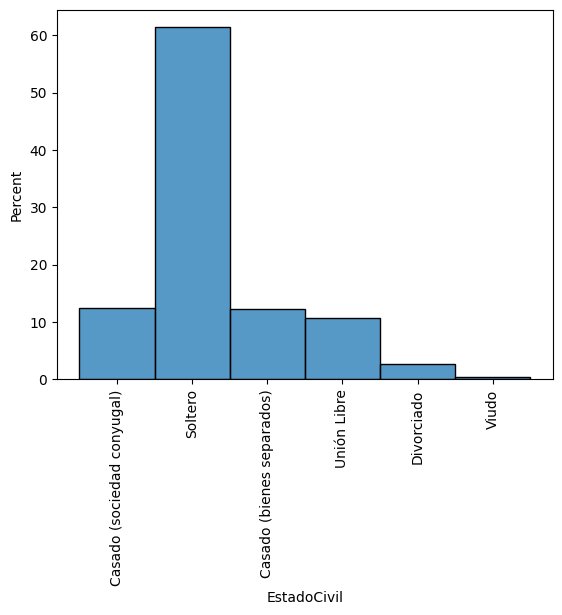

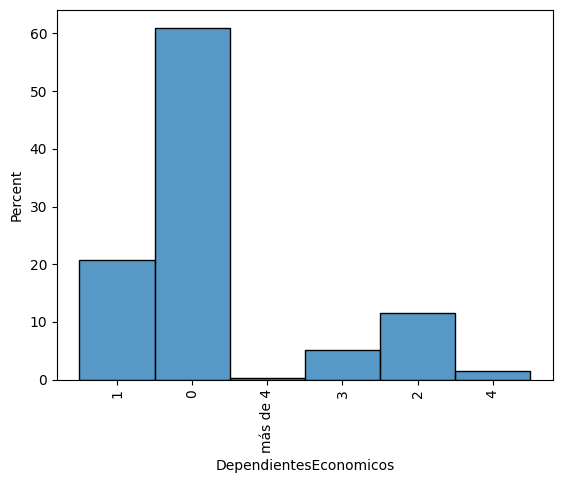

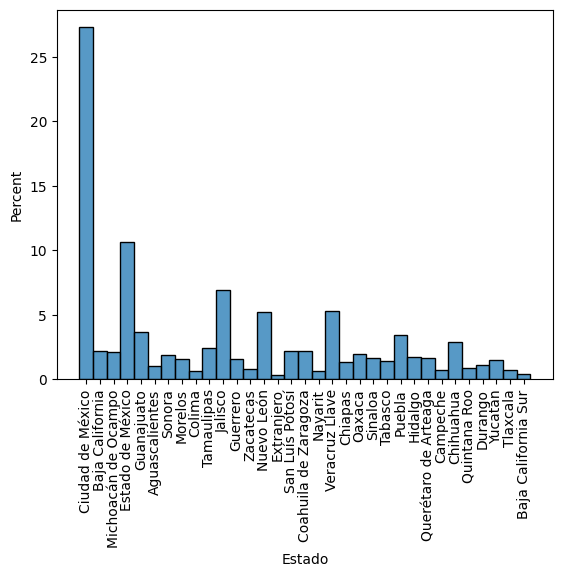

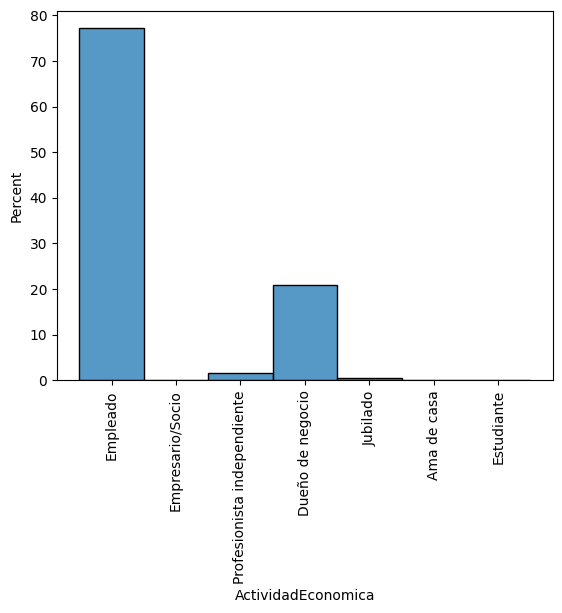

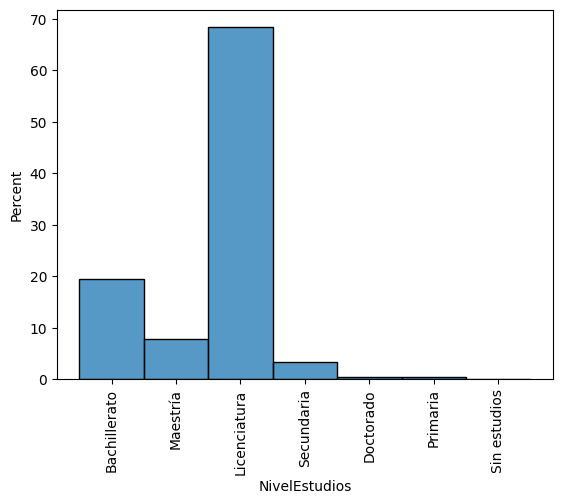

In [57]:
categoricas = [i for i in df.columns if df[i].dtype=='object']
id_flag = ['prospectus_id','es_malo_actual']
numericas = [i for i in df.columns if i not in categoricas + id_flag]

for i, col in enumerate(df[categoricas].columns):
    plt.figure(i)
    plt.xticks(rotation=90)
    sns.histplot(df[categoricas][col], stat='percent')


In [60]:
for i in df[categoricas].columns: 
    print("La cardinalidad de la variable " + i + " (var categorica) es " + str(df[i].nunique()))

La cardinalidad de la variable Genero (var categorica) es 2
La cardinalidad de la variable EstadoCivil (var categorica) es 6
La cardinalidad de la variable DependientesEconomicos (var categorica) es 6
La cardinalidad de la variable Estado (var categorica) es 33
La cardinalidad de la variable ActividadEconomica (var categorica) es 7
La cardinalidad de la variable NivelEstudios (var categorica) es 7


#### Comentarios

### ¿Hay valores atípicos en el conjunto de datos?

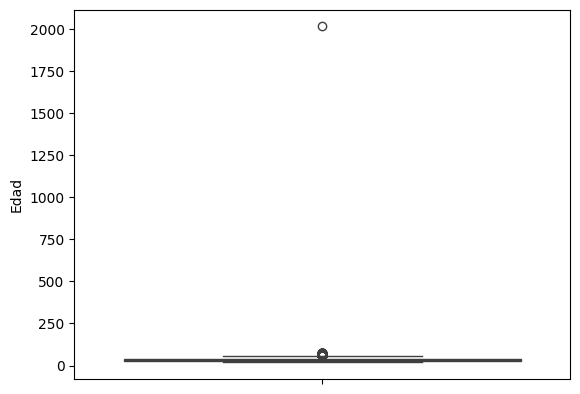

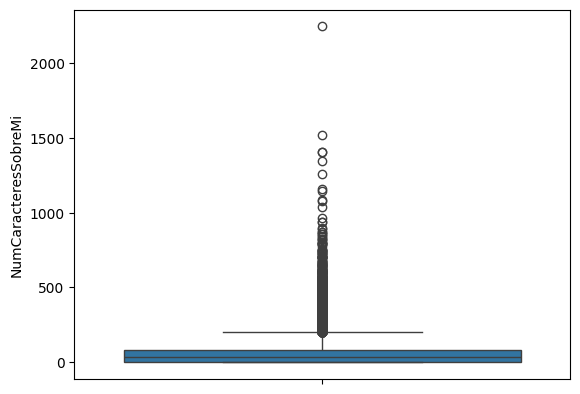

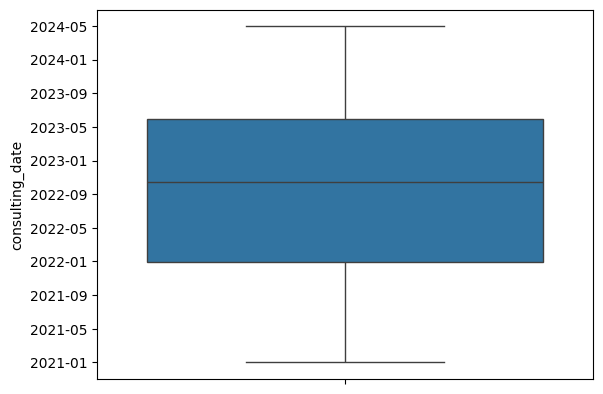

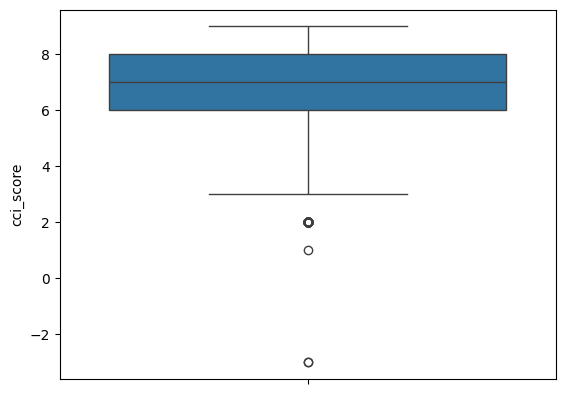

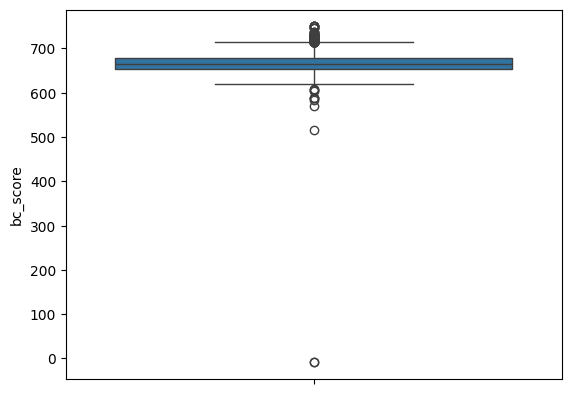

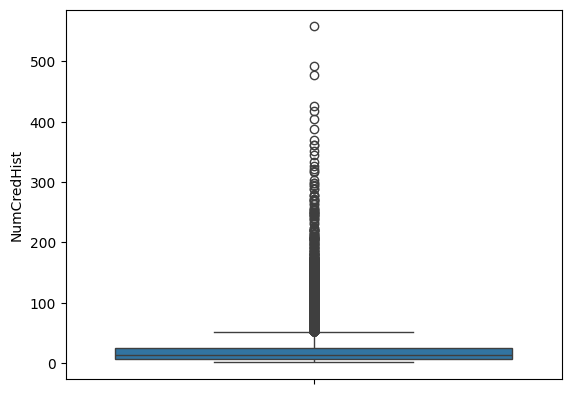

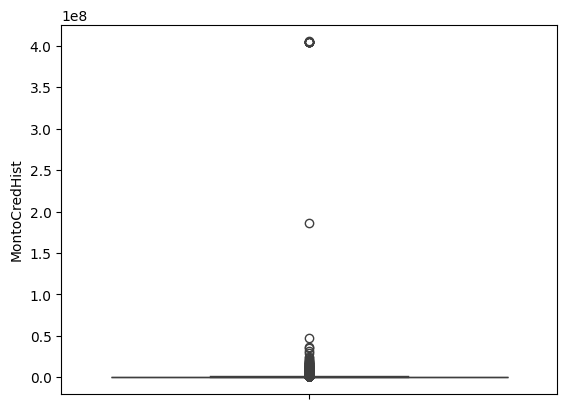

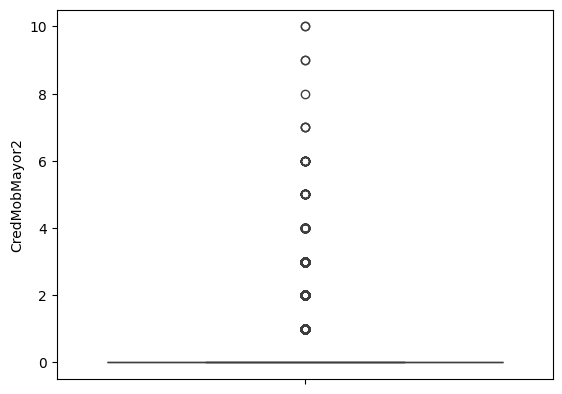

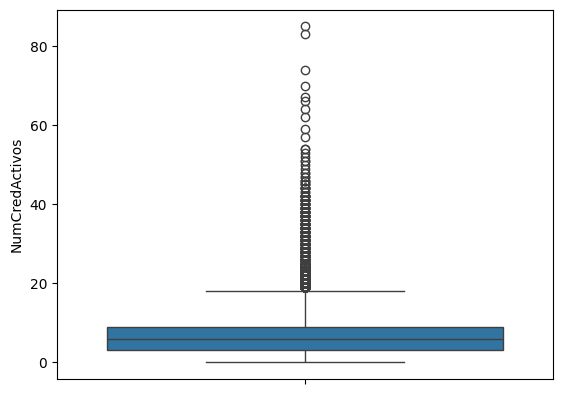

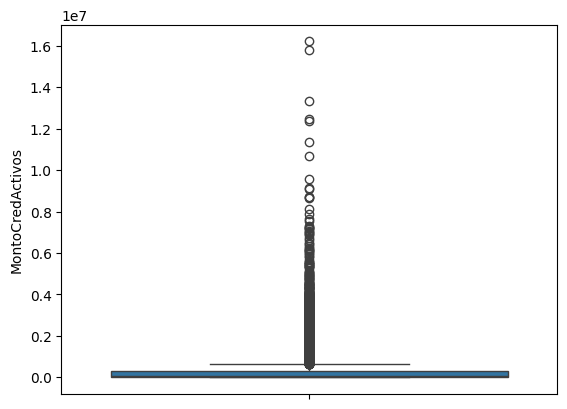

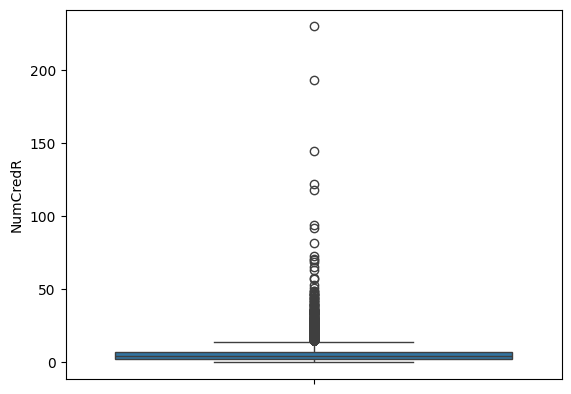

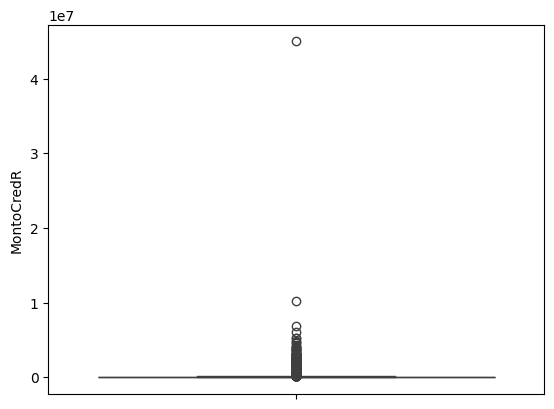

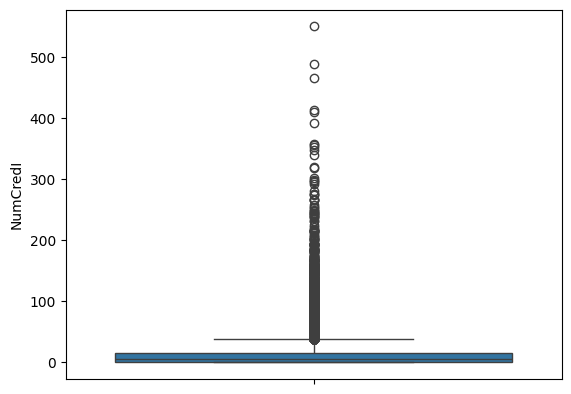

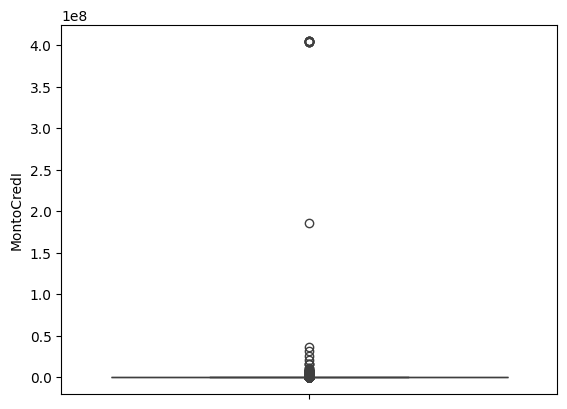

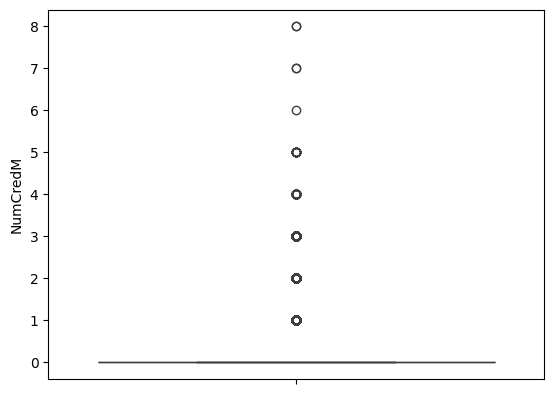

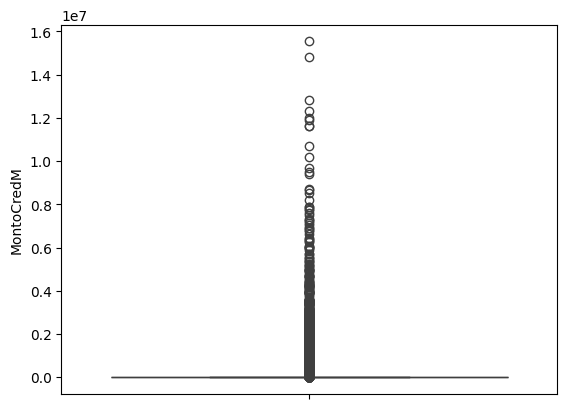

In [58]:
for i, col in enumerate(df[numericas].columns):
    plt.figure(i)
    plt.xticks(rotation=90)
    sns.boxplot(df[numericas][col])


##### Comentarios 



### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/2881539725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], hist=False)


/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/2881539725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], hist=False)
/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/2881539725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

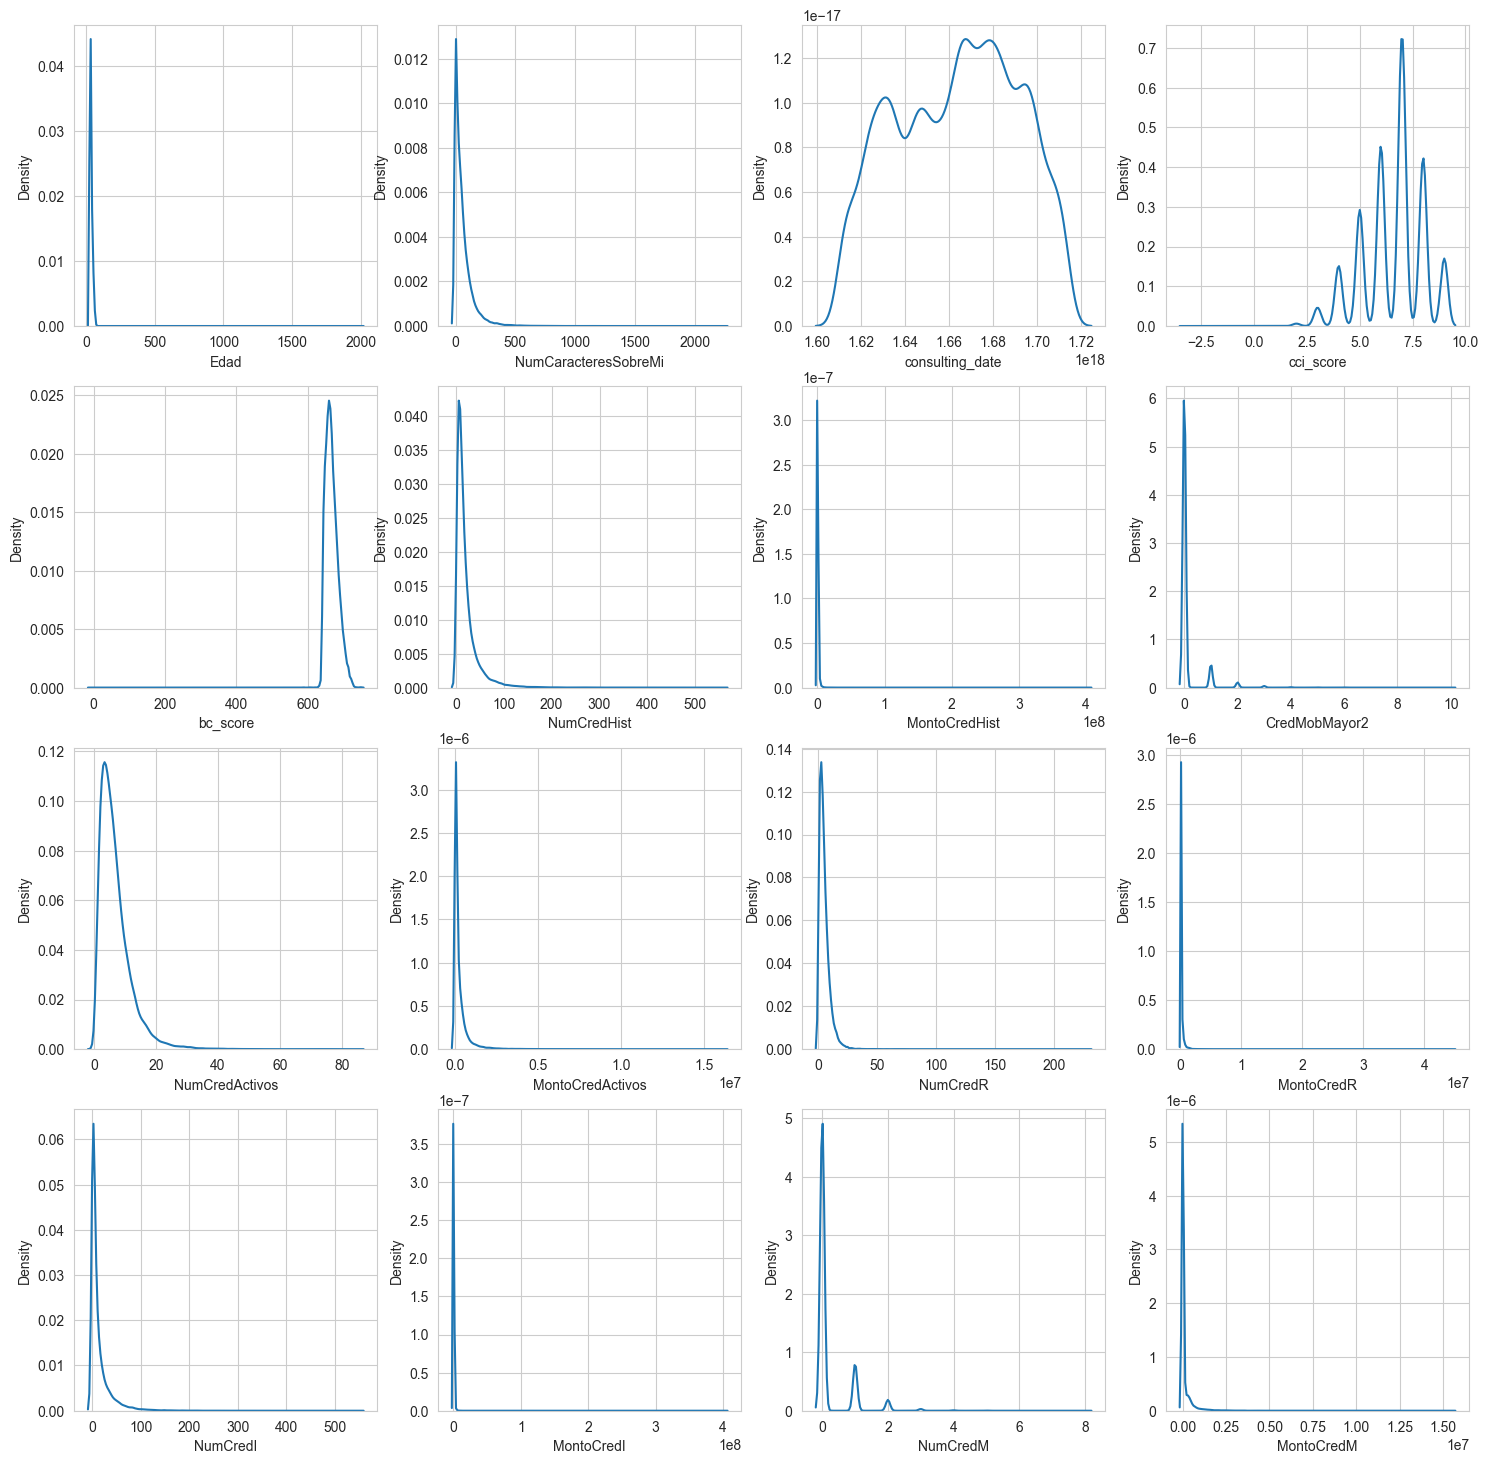

In [73]:
plt.figure(figsize=(18,18))
i=0
for feature in numericas:
        i += 1
        plt.subplot(4,4,i)
        sns.distplot(df[feature], hist=False)
    
    

#### Distribución de la variable por bueno y malo

/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/286741771.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[feature], hist=False,label=label1)
/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/286741771.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Figure size 1800x1800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

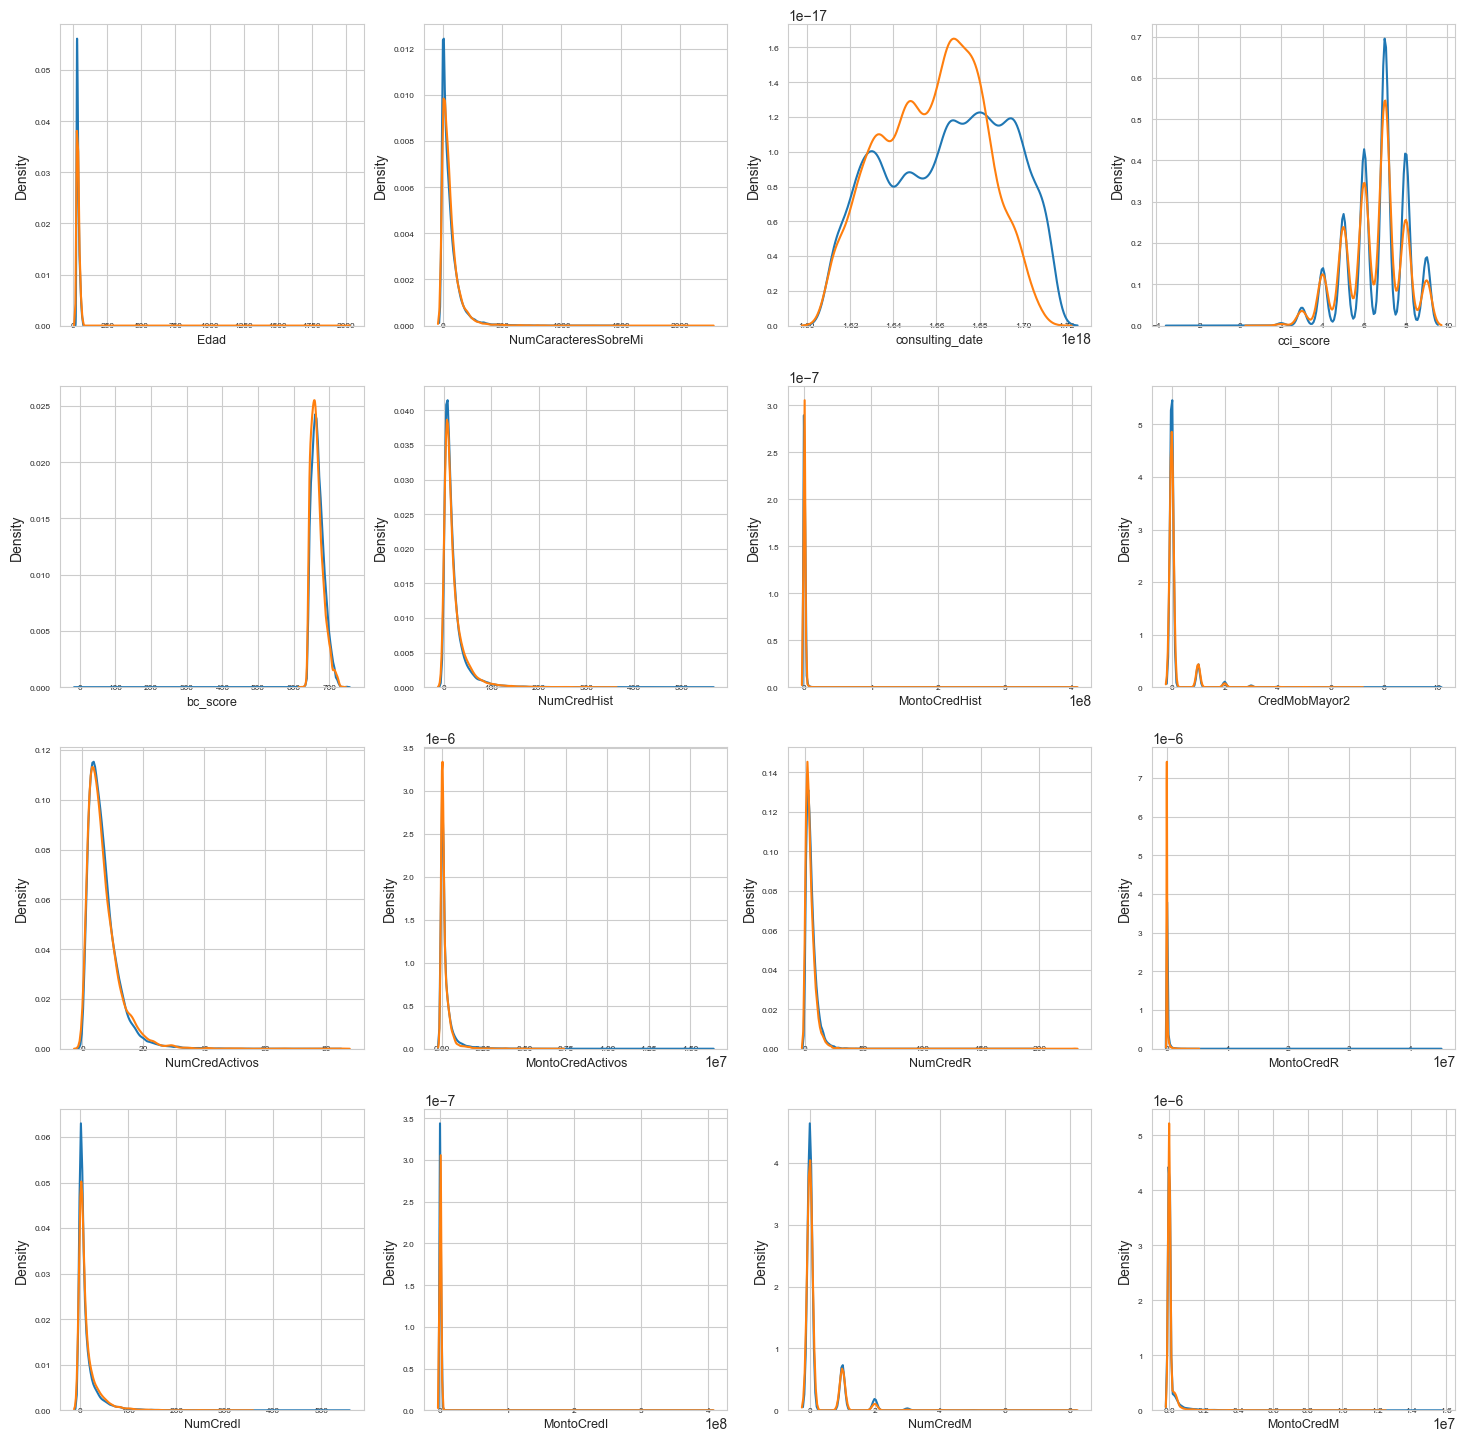

In [68]:
malo=df[df['es_malo_actual']==1]
bueno=df[df['es_malo_actual']==0]

plt.figure(figsize=(18,18))
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(18,18))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
t0 = bueno
t1 = malo
features = numericas
plot_feature_distribution(t0, t1, '0', '1', features)

### ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

In [77]:
df.head()

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,CredMobMayor2,NumCredActivos,MontoCredActivos,NumCredR,MontoCredR,NumCredI,MontoCredI,NumCredM,MontoCredM,es_malo_actual
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,0.0,13.0,61603.0,7.0,14997.0,10.0,98826.0,0.0,0.0,0
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,0.0,13.0,12463.0,5.0,10469.0,49.0,37484.0,0.0,0.0,0
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,0.0,4.0,251672.0,9.0,527690.0,1.0,113100.0,0.0,0.0,0
3,9969,48,Hombre,Casado (bienes separados),1,Ciudad de México,Profesionista independiente,Licenciatura,25,2024-01-15 15:11:58,...,0.0,5.0,349663.0,4.0,33826.0,1.0,50900.0,0.0,0.0,0
4,12520,53,Hombre,Casado (bienes separados),3,Baja California,Empleado,Maestría,79,2021-07-07 20:44:43,...,1.0,2.0,253688.0,3.0,305643.0,1.0,253688.0,2.0,251228.0,0


In [92]:
fechas = df[['consulting_date','es_malo_actual']]
fechas['year'] = pd.to_datetime(df['consulting_date'], format='%m/%d/%Y')
fechas['month'] = pd.to_datetime(df['consulting_date'], format='%m/%d/%Y')
fechas['year'] = fechas['year'].dt.year
fechas['month'] = fechas['month'].dt.month
fechas['cohorte'] = fechas['year']* 100 + fechas['month']

/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/153684548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fechas['year'] = pd.to_datetime(df['consulting_date'], format='%m/%d/%Y')
/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/153684548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fechas['month'] = pd.to_datetime(df['consulting_date'], format='%m/%d/%Y')
/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/153684548.py:4: SettingWithCopyWarning: 
A v

In [138]:
#cohorte = fechas[['cohorte','es_malo_actual']].groupby('cohorte').agg({'es_malo_actual': ['count','sum']})
cohorte = fechas[['year','es_malo_actual']].groupby('year').agg({'es_malo_actual': ['count','sum']})
cohorte.columns = ['count','sum']
cohorte['mora'] = cohorte['sum']/cohorte['count']
cohorte.reset_index()

,year,count,sum,mora
0,2021,8883,1847,0.207925
1,2022,11664,3078,0.263889
2,2023,12355,2100,0.169972
3,2024,2295,53,0.023094


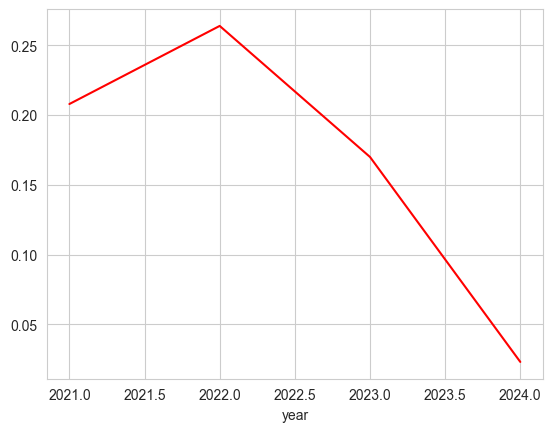

In [139]:
cohorte['mora'].plot(kind='line', color='red')

plt.show()

### ¿Hay correlación entre las variables dependientes e independientes?

In [132]:
variables = numericas + ['es_malo_actual']

In [133]:
print("Significant features relative to target variable Class CF")

corr1 = df[variables].corr()['es_malo_actual']
# convert series to dataframe so it can be sorted
corr1 = pd.DataFrame(corr1)

corr1.columns = ["Correlation"]
# sort correlation
corr2 = corr1.sort_values(by=['Correlation'], ascending=False).reset_index()
corr2.head(10)

Significant features relative to target variable Class CF


,index,Correlation
0,es_malo_actual,1.000000
1,NumCredI,0.022811
2,Edad,0.016120
3,NumCaracteresSobreMi,0.008052
4,NumCredHist,0.006043
5,NumCredActivos,0.005650
6,CredMobMayor2,-0.001809
7,MontoCredI,-0.001975
8,MontoCredHist,-0.006301
9,NumCredM,-0.022783


/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/868106803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = corr2_pos[corr2_pos['index']!='es_malo_actual'], x= 'index', y = 'Correlation',palette='rainbow')


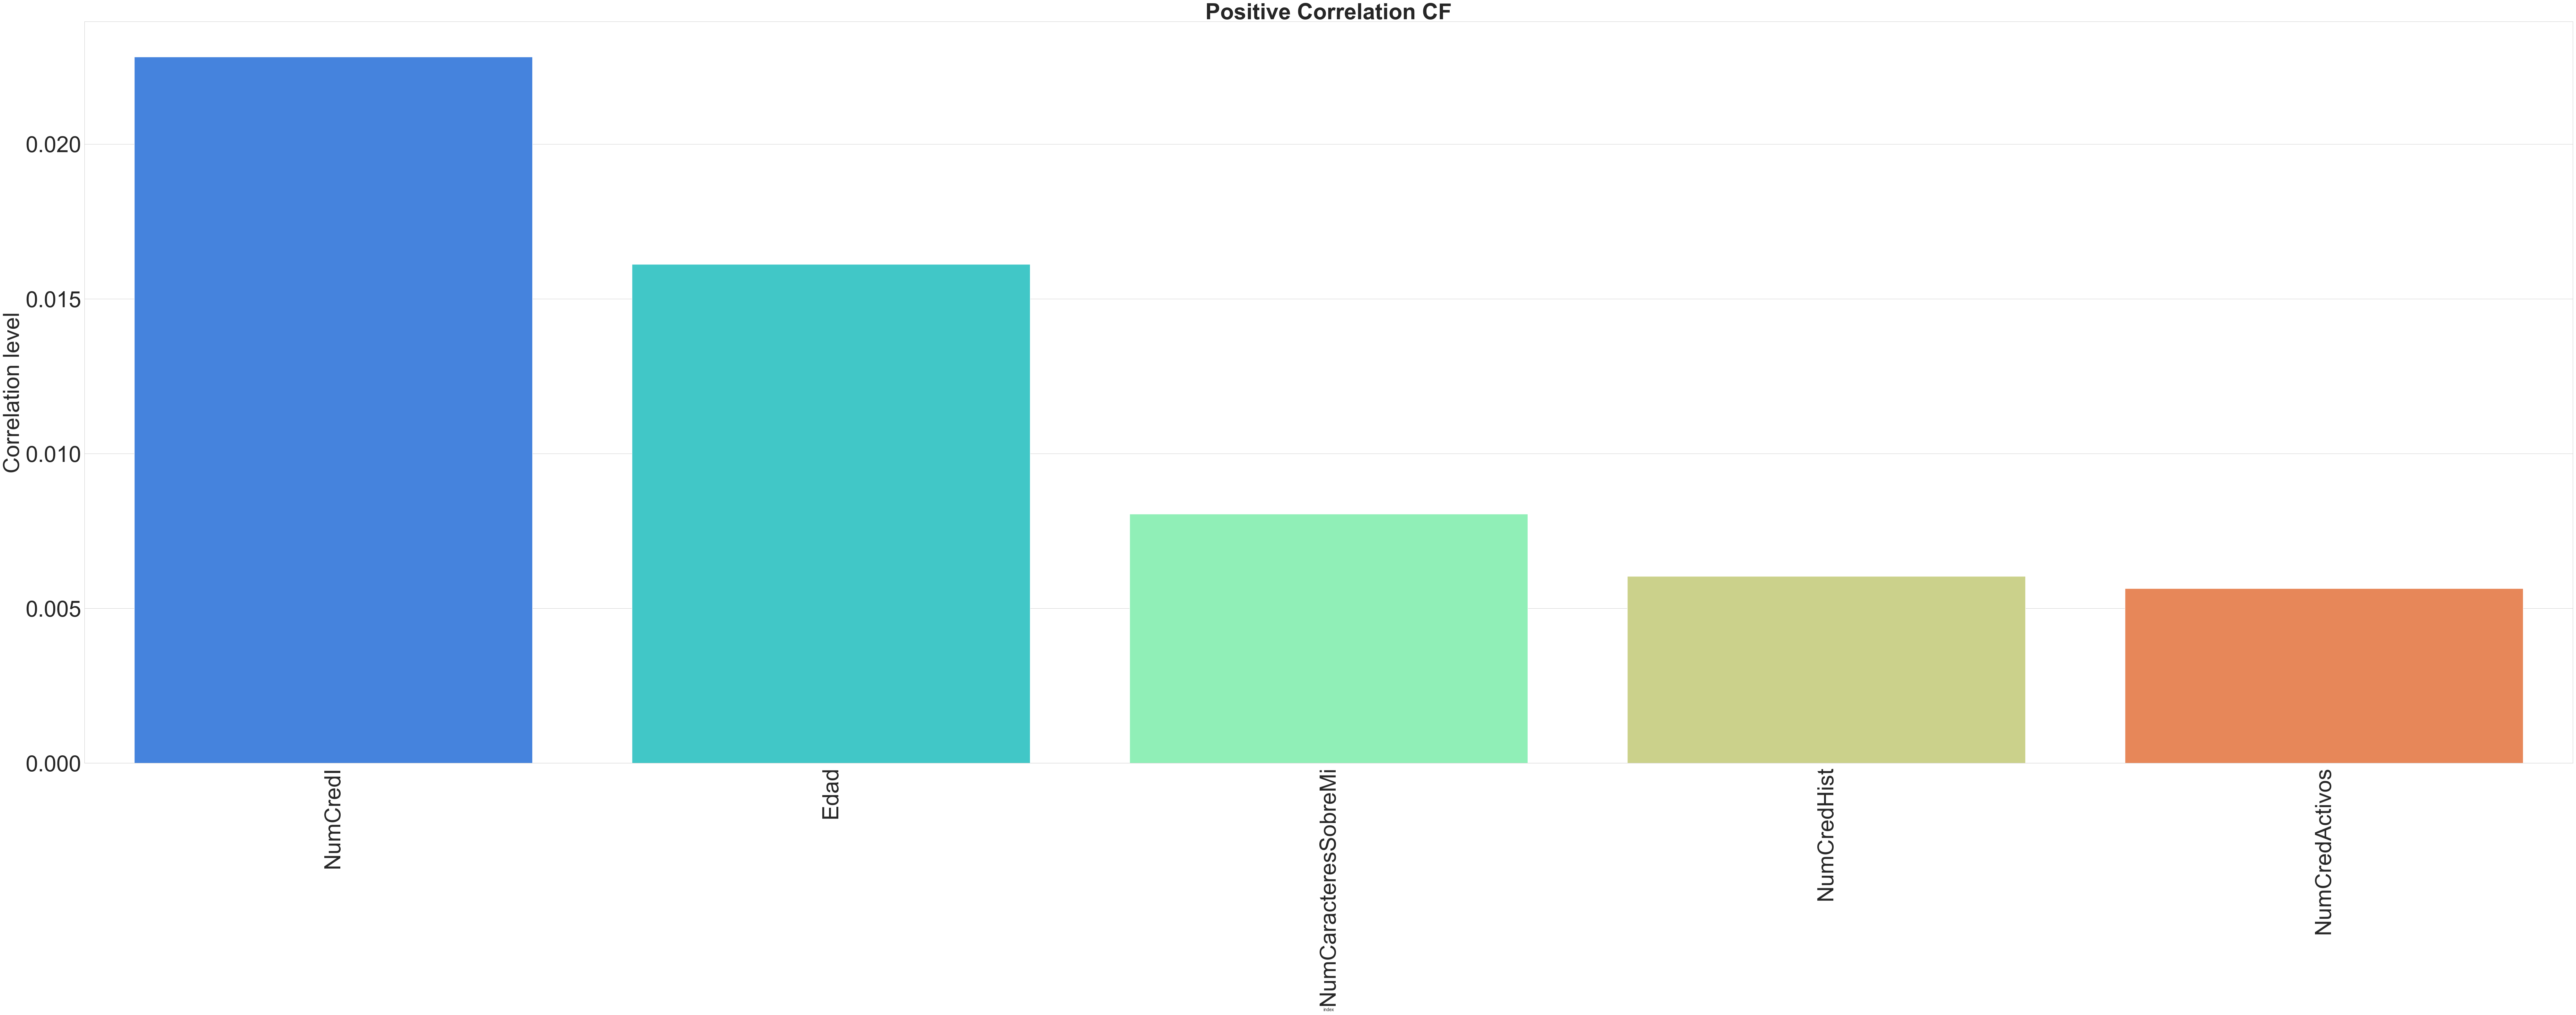

In [136]:
corr2_pos = corr2[corr2['Correlation']>=0]
plt.figure(figsize=(100, 30))
sns.barplot(data = corr2_pos[corr2_pos['index']!='es_malo_actual'], x= 'index', y = 'Correlation',palette='rainbow')
plt.xticks(rotation=90)
plt.title('Positive Correlation CF', fontweight='bold',fontsize=50)
plt.ylabel("Correlation level",fontsize=50)
plt.tick_params(labelsize=50)
plt.show()

/var/folders/xs/r0y44z7j6mldtrghl9n03w880000gn/T/ipykernel_52403/731655907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = corr2_pos[corr2_pos['index']!='es_malo_actual'], x= 'index', y = 'Correlation',palette='rainbow')


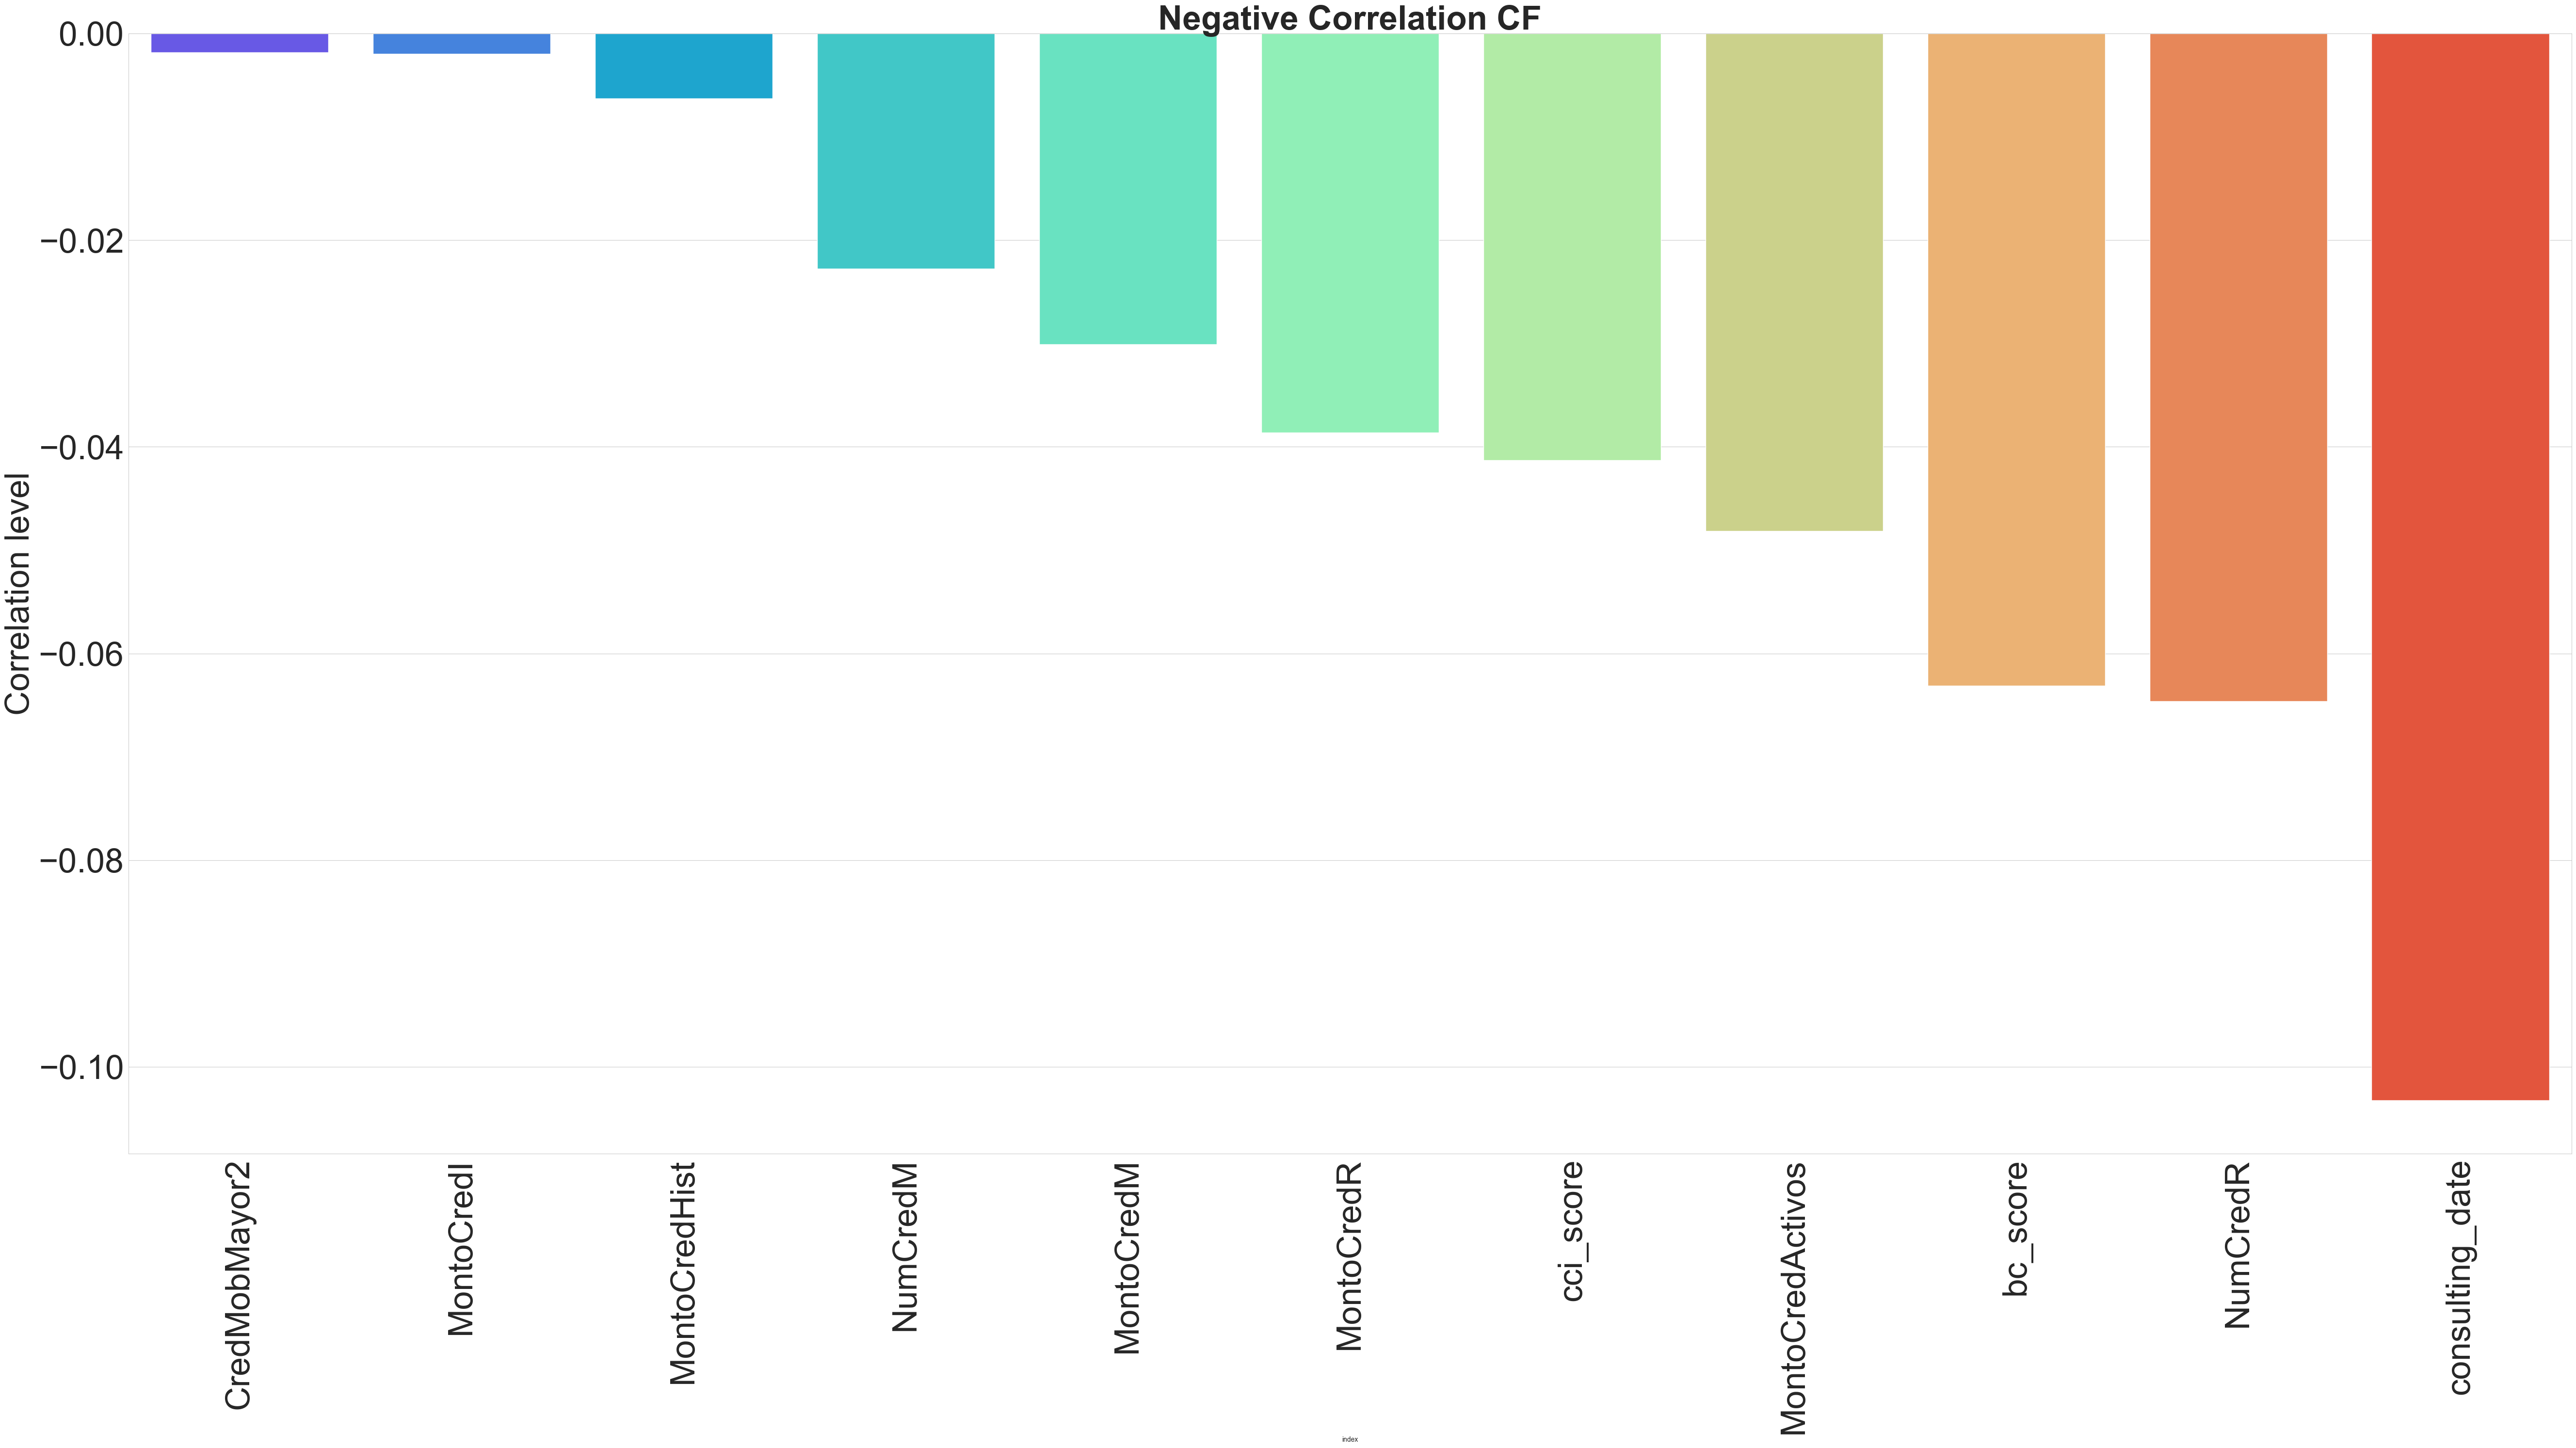

In [137]:
corr2_pos = corr2[corr2['Correlation']<0]
plt.figure(figsize=(65, 30))
sns.barplot(data = corr2_pos[corr2_pos['index']!='es_malo_actual'], x= 'index', y = 'Correlation',palette='rainbow')
plt.xticks(rotation=90)
plt.title('Negative Correlation CF', fontweight='bold',fontsize=50)
plt.ylabel("Correlation level",fontsize=50)
plt.tick_params(labelsize=50)
plt.show()


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

¿Hay desequilibrio en las clases de la variable objetivo?

## Conclusiones